### Firefox bugs are the issues found in the Mozilla Firefox. Collected the data from the official website of the [Mozilla](https://bugzilla.mozilla.org/describecomponents.cgi).
#### Sample bug is displayed herein:

|Bug ID |	Type	| Summary	| Product	| Component |	Assignee |Status	| Resolution	| Updated
| --- |---| --- | --- | --- | --- | --- | --- | --- |
| 1536420	 | defect |	PDF uses lot of memory when decoding	| Firefox |	PDF Viewer	| nobody@mozilla.org	| UNCONFIRMED	| --- |	4/15/2022 21:22 |

---
#### In this notebook bug types are classified which is imbalance dataset, types of bugs are: 
---
- defect
- enhancement
- Task

### Required Pakcages

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

### Getting data

In [53]:
bugs = pd.read_csv('bugs-2022-09-07.csv') # read the file from local directory

In [54]:
bugs.head() # display top five bugs

,Bug ID,Type,Summary,Product,Component,Assignee,Status,Resolution,Updated
0,1653320,defect,Global sharing indicator blocks access to menu...,Firefox,Site Permissions,mconley,UNCONFIRMED,---,2021-08-28 01:05:31
1,1355978,defect,show tab favicons immediately,Firefox,Tabbed Browser,nobody,UNCONFIRMED,---,2022-07-16 19:20:28
2,1404034,defect,Icon looks pixelated on gnome3,Firefox,Theme,nobody,UNCONFIRMED,---,2019-06-12 17:37:21
3,1404295,defect,Firefox developer edition - default browser issue,Firefox,Shell Integration,nobody,UNCONFIRMED,---,2021-11-24 07:03:37
4,1405504,defect,Can no longer scroll the tab bar using touch o...,Firefox,Tabbed Browser,nobody,UNCONFIRMED,---,2017-11-01 02:48:05


### Exploratory Data Analysis

In [55]:
bugs.info() # to get info of missing values and data types of the attributes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bug ID      10000 non-null  int64 
 1   Type        10000 non-null  object
 2   Summary     10000 non-null  object
 3   Product     10000 non-null  object
 4   Component   10000 non-null  object
 5   Assignee    10000 non-null  object
 6   Status      10000 non-null  object
 7   Resolution  10000 non-null  object
 8   Updated     10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


In [56]:
bugs['Type'].value_counts()  # count the bugs types 

defect         6848
enhancement    2540
task            612
Name: Type, dtype: int64

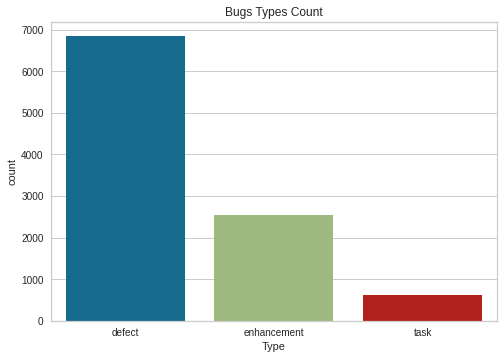

In [57]:
sns.countplot(data = bugs, x = 'Type').set(title='Bugs Types Count')
plt.show()

Conclusion:
* 8 Categorical and 1 numerical features are found
* No missing values are found
* Dataset is imbalance

Upsampling or downsampling is requrired for the balancing\
**or**\
Use Random Forest which is performing good with comarision to other models on imbalance dataset.


# Feature Selection

In [58]:
X = bugs['Summary'] 
y = bugs['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state  = 42) #splitting the dataset by 80/20 for train/test respectively.

# Model Training

In [59]:
# creating the pipeline with components of TFID and an Estimator
bug_clf = Pipeline([('tfidf', TfidfVectorizer()), 
                    ('clf', RandomForestClassifier())])

bug_clf.fit(X_train, y_train) # train the model

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

# Model Evaluations

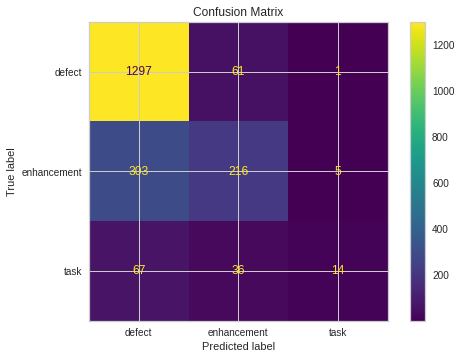

In [60]:
# plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, bug_clf.predict(X_test)),
                                      display_labels = bug_clf.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Printing Classification report
print(metrics.classification_report(y_test, bug_clf.predict(X_test)))

              precision    recall  f1-score   support

      defect       0.78      0.95      0.86      1359
 enhancement       0.69      0.41      0.52       524
        task       0.70      0.12      0.20       117

    accuracy                           0.76      2000
   macro avg       0.72      0.50      0.53      2000
weighted avg       0.75      0.76      0.73      2000



# Saving the model

In [63]:
from joblib import dump, load
dump(bug_clf, 'bug_clf.joblib') 

['bug_clf.joblib']

# Loading the model

In [65]:
bug_clf = load('bug_clf.joblib') 

# Final Remarks
This notebook can be optimized or improved with many ways:
1. Implementation of SMOTE for balancing of dataset 
2. Other models should be checked as well, Like Transformer based
3. Can be fine tune with using GridSearch for multiple hyperparamaters.